In [155]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [156]:
def first_polygon_mask(event,x,y,flags,params):    #gets the main overall segment
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(temp_image,(x,y),4,(255,0,0),-1)
        first_mask.append([x,y])                  #get points for first mask
        cv2.imshow("image",temp_image)            # leave "image" name the same for all temp images..
                                                  #this is to because you want to use the same image.
        
def second_polygon_mask(event,x,y,flags,params):    #used to remove inner segments that aren't needed
    if event == cv2.EVENT_LBUTTONDOWN:            # use the left click to get the points of a set
        cv2.circle(temp_image,(x,y),4,(0,255,0),-1)
        second_mask.append([x,y])
        cv2.imshow("image",temp_image)
    if event == cv2.EVENT_RBUTTONDOWN:            # use the right click to complete a set of points
        hold = second_mask.copy()    # second_mask and main_second_black are somehow connected by referencing..so I do this
        main_second_mask.append(hold)
        print(second_mask)
        second_mask.clear()
        print("One mask set done {}".format(main_black))

In [ ]:
#switching second mask and first mask
#hence second mask is done first
# USE LESS POINTS TO AVOID AFFECTING POLYGON DEFINITION #cv2 problem

In [182]:
cam_name = "camera5"
path = "factory_imgs/" + cam_name +".png"
im = cv2.imread(path)
imm = cv2.cvtColor(im,cv2.COLOR_RGB2BGR)
temp_image = im.copy()          #temporary copy of main image used to highlight points for masks


second_mask = []
main_second_mask = []
cv2.imshow("image",temp_image)
cv2.setMouseCallback("image",second_polygon_mask)
cv2.waitKey(0)
cv2.destroyAllWindows
print(main_second_mask)

[[530, 338], [523, 407], [598, 415], [604, 338]]
One mask set done []
[[590, 187], [581, 233], [588, 270], [644, 269], [665, 235], [665, 173], [620, 169]]
One mask set done []
[[572, 32], [565, 137], [529, 144], [493, 139], [486, 80], [497, 26]]
One mask set done []
[[689, 147], [756, 143], [791, 94], [794, 30], [716, 28], [688, 89]]
One mask set done []
[[717, 281], [779, 283], [830, 256], [830, 184], [764, 185], [721, 223]]
One mask set done []
[[492, 268], [492, 209], [471, 179], [418, 178], [404, 208], [403, 252], [438, 277]]
One mask set done []
[[379, 103], [375, 156], [319, 160], [270, 112], [272, 53], [320, 41]]
One mask set done []
[[349, 352], [446, 350], [438, 425], [385, 432], [338, 415], [344, 384]]
One mask set done []
[[340, 328], [232, 312], [236, 253], [258, 238], [352, 259]]
One mask set done []
[[698, 340], [801, 348], [795, 424], [747, 422], [685, 407]]
One mask set done []
[[828, 519], [826, 581], [786, 580], [749, 577], [709, 535], [721, 479], [777, 483]]
One mask

## when selecting points for full boundary of floor plane, let the points of the floor plane cut be the screen be a bit further from the screen edge

[[246, 655], [832, 656], [832, 66], [246, 63]]


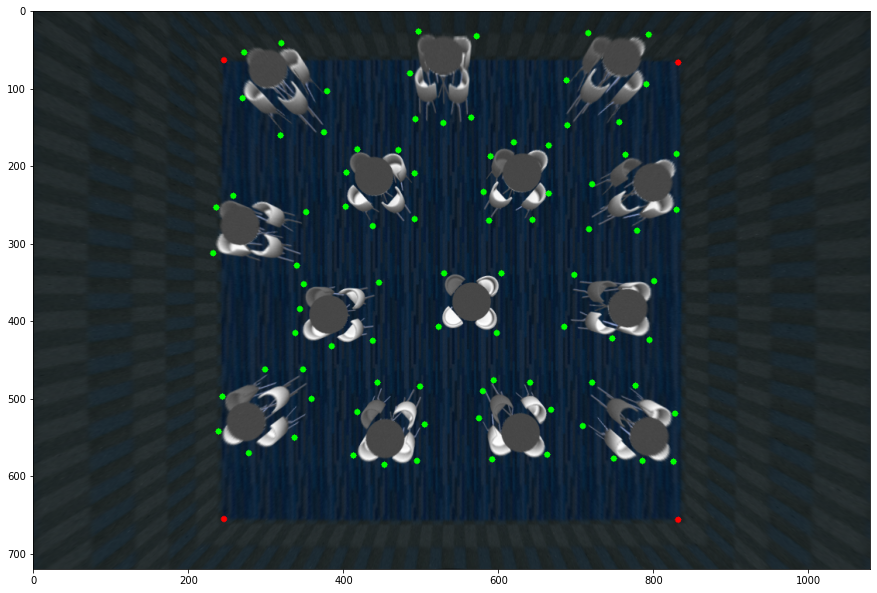

In [183]:
first_mask = []
cv2.imshow("image",temp_image)
cv2.setMouseCallback("image",first_polygon_mask)   #call mouse event
cv2.waitKey(0)
cv2.destroyAllWindows()
print(first_mask)
plt.figure(figsize=(15,15))
plt.imshow(temp_image)

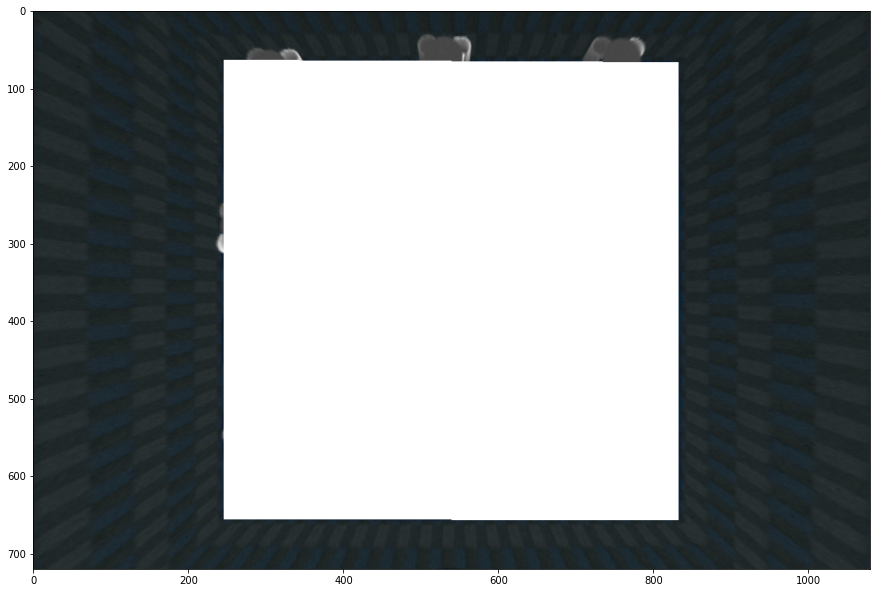

In [184]:


mask_w = np.zeros(temp_image.shape,dtype=np.uint8) #create blank image
poly = np.int64(np.array(first_mask))    #create polygon
cv2.fillConvexPoly(mask_w,poly,(255,255,255))  # fill polygon in image

# mask_w = cv2.bitwise_not(mask_w)   # invert colors with this line
other_im = im.copy()  #temporary copy 2
# mask_two = cv2.bitwise_and(other_im,mask_w)  #combine the images
mask_two = cv2.bitwise_or(other_im,mask_w)  #combine the images***********
plt.figure(figsize=(15,15))
plt.imshow(mask_two)


/home/kiki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


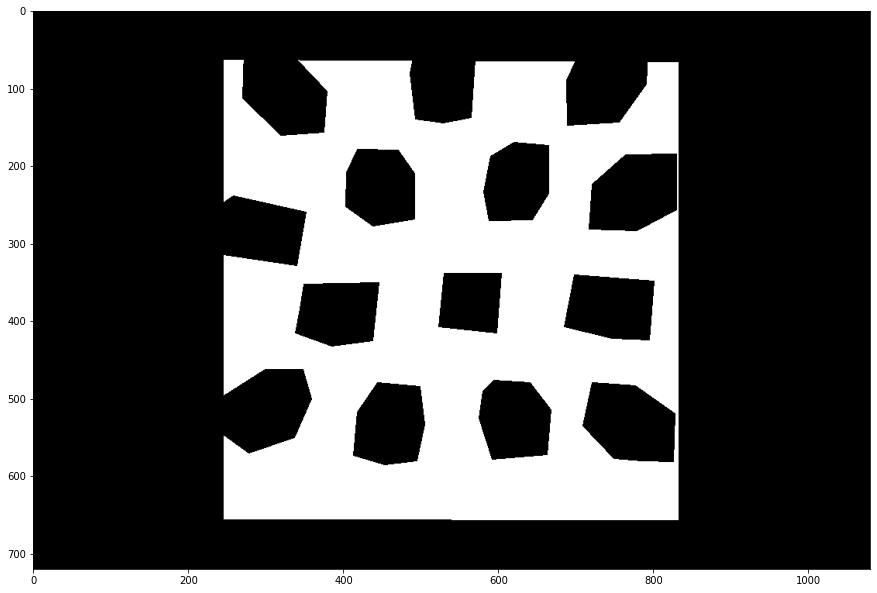

In [185]:
main_second_mask = np.array(main_second_mask)
mask_b = np.zeros(temp_image.shape,dtype=np.uint8)
# print(main_second_mask.shape)

for pts in main_second_mask:     #go through all the set of points to create individual masks
    poly = np.int32(np.array(pts))
    cv2.fillConvexPoly(mask_b,poly,(255,255,255))
    other_im = im.copy()
    mask_one = cv2.bitwise_and(other_im,mask_b)

    
mask_b = cv2.bitwise_not(mask_b)    
# final_image = cv2.bitwise_or(mask_two,mask_one)
final_image = cv2.bitwise_and(mask_two,mask_one)    #   *******
# final_mask = cv2.bitwise_or(mask_w,mask_b)
final_mask = cv2.bitwise_and(mask_w,mask_b)       # *******
final_image = cv2.cvtColor(final_image,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(15,15))
plt.imshow(final_mask)

In [186]:
destination_path = "segmented_imgs/"+cam_name+".png"
cv2.imwrite(destination_path,final_mask)   #save image mask

True

In [ ]:
# np_savename = cam_name + ".npy"
# with open(np_savename, 'wb') as f:
#     np.save(f, np.array([1, 2]))

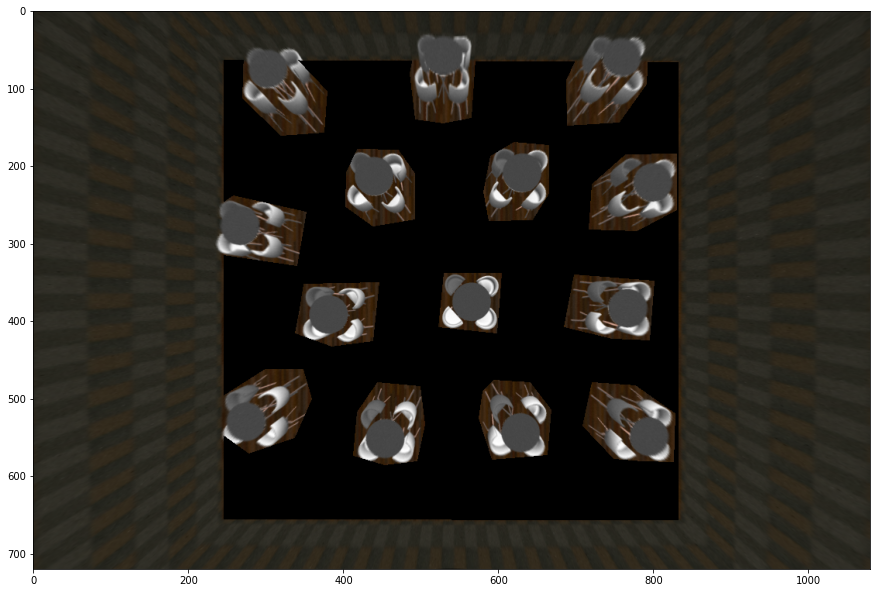

In [189]:
inv = cv2.bitwise_not(final_mask)
ff = cv2.bitwise_and(inv,imm)
plt.figure(figsize=(15,15))
plt.imshow(ff)